### Solving Poisson Equation on S^2: $\Delta u = f$


iteration 0: loss = 55.76702880859375


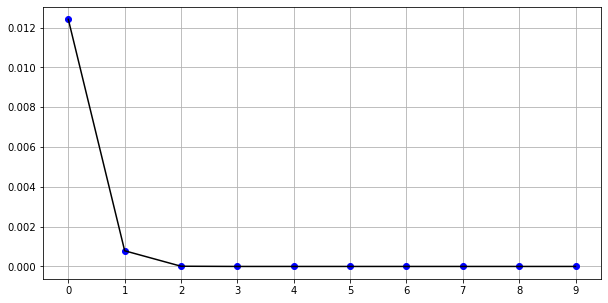

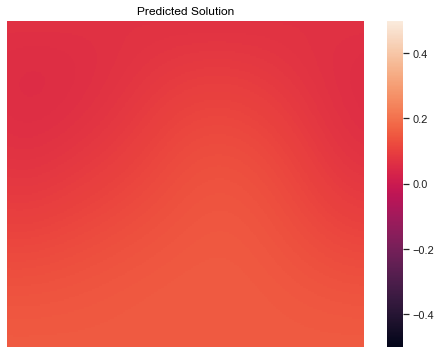

iteration 10: loss = 55.733211517333984
iteration 20: loss = 55.730525970458984
iteration 30: loss = 55.729156494140625
iteration 40: loss = 55.72848892211914
iteration 50: loss = 55.72708511352539
iteration 60: loss = 55.72113037109375
iteration 70: loss = 55.6733283996582
iteration 80: loss = 55.16225051879883
iteration 90: loss = 50.41933059692383
iteration 100: loss = 48.20411682128906


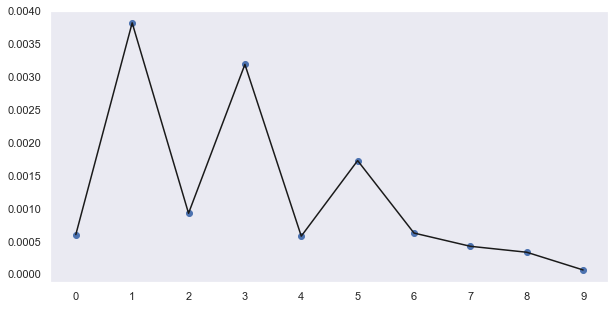

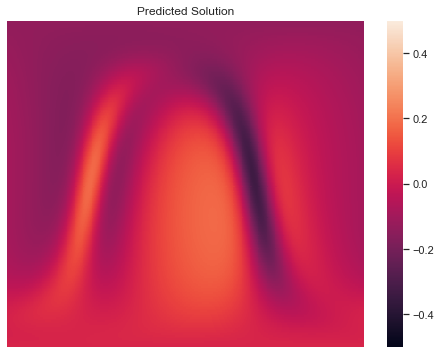

iteration 110: loss = 45.97978591918945
iteration 120: loss = 44.05710983276367
iteration 130: loss = 42.25419616699219
iteration 140: loss = 39.583316802978516
iteration 150: loss = 37.27463150024414
iteration 160: loss = 34.20585250854492
iteration 170: loss = 30.783184051513672
iteration 180: loss = 26.813932418823242
iteration 190: loss = 21.637588500976562
iteration 200: loss = 16.881385803222656


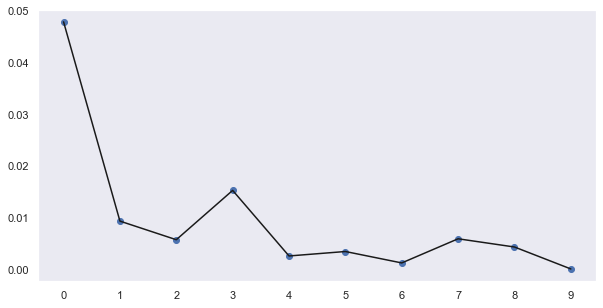

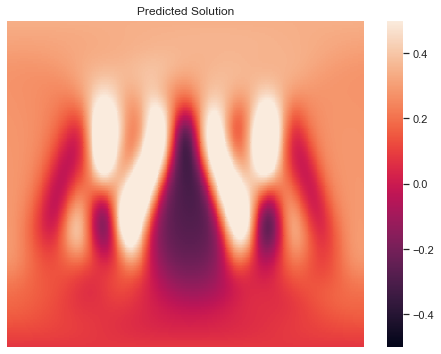

iteration 210: loss = 13.813097953796387
iteration 220: loss = 11.020708084106445
iteration 230: loss = 7.649674415588379
iteration 240: loss = 3.9852118492126465
iteration 250: loss = 1.8462238311767578
iteration 260: loss = 1.144736886024475
iteration 270: loss = 0.8083248138427734
iteration 280: loss = 0.6425079107284546
iteration 290: loss = 0.5366148948669434
iteration 300: loss = 0.4655519127845764


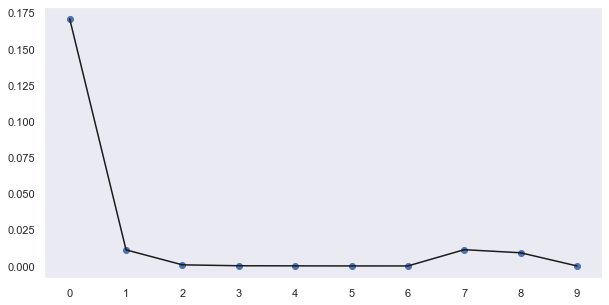

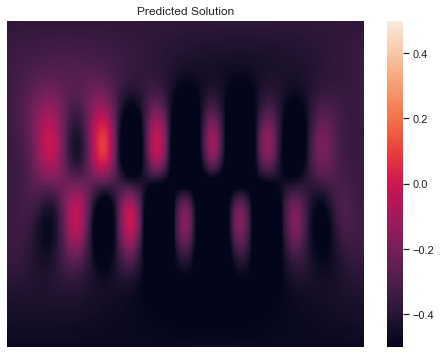

iteration 310: loss = 0.41376644372940063
iteration 320: loss = 0.373453289270401
iteration 330: loss = 0.3411027193069458
iteration 340: loss = 0.3136294484138489
iteration 350: loss = 0.28949806094169617
iteration 360: loss = 0.2677818536758423
iteration 370: loss = 0.24793459475040436
iteration 380: loss = 0.2294858992099762
iteration 390: loss = 0.21230335533618927
iteration 400: loss = 0.19613036513328552


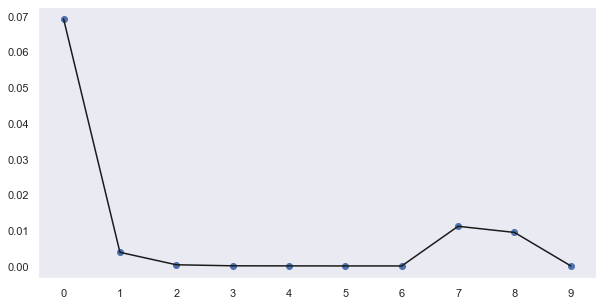

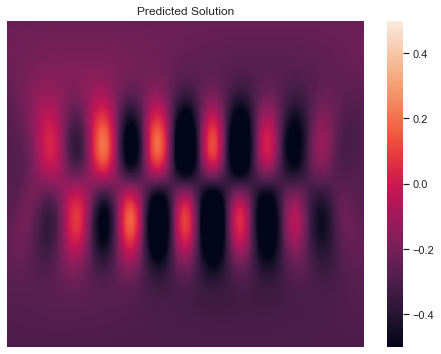

iteration 410: loss = 0.18094785511493683
iteration 420: loss = 0.1667124480009079
iteration 430: loss = 0.1533568650484085
iteration 440: loss = 0.1408742219209671
iteration 450: loss = 0.1292477399110794
iteration 460: loss = 0.11852182447910309
iteration 470: loss = 0.10869075357913971
iteration 480: loss = 0.09973688423633575
iteration 490: loss = 0.09148520231246948
iteration 500: loss = 0.08397135138511658


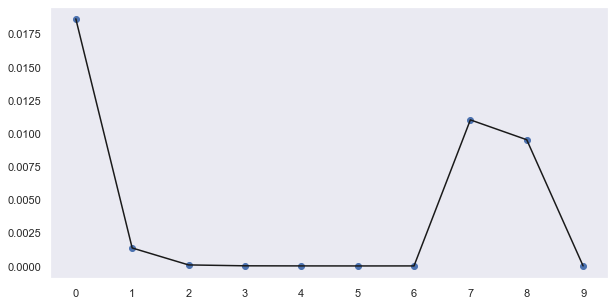

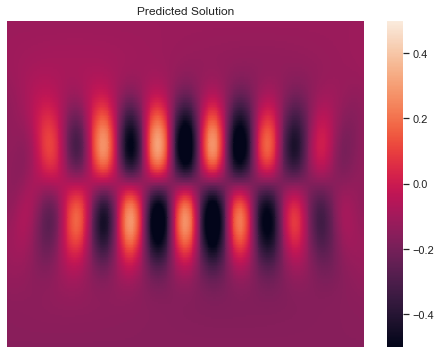

iteration 510: loss = 0.07715937495231628
iteration 520: loss = 0.07101263850927353
iteration 530: loss = 0.06537777930498123
iteration 540: loss = 0.060316525399684906
iteration 550: loss = 0.05576404929161072
iteration 560: loss = 0.051669687032699585
iteration 570: loss = 0.0478680357336998
iteration 580: loss = 0.04448685795068741
iteration 590: loss = 0.041444506496191025
iteration 600: loss = 0.038823310285806656


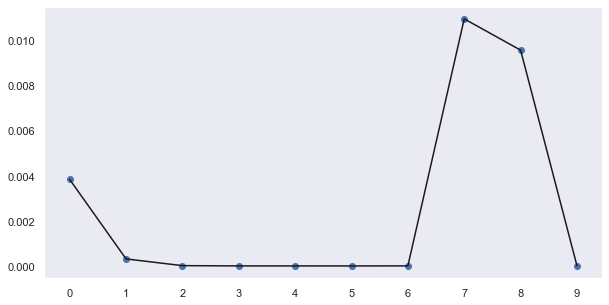

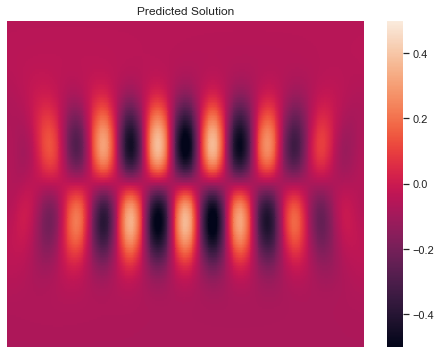

iteration 610: loss = 0.03615405783057213
iteration 620: loss = 0.03391965106129646
iteration 630: loss = 0.03187153860926628
iteration 640: loss = 0.030072931200265884
iteration 650: loss = 0.029530644416809082
iteration 660: loss = 0.02694472298026085
iteration 670: loss = 0.026464158669114113
iteration 680: loss = 0.024806100875139236
iteration 690: loss = 0.023223329335451126
iteration 700: loss = 0.022172125056385994


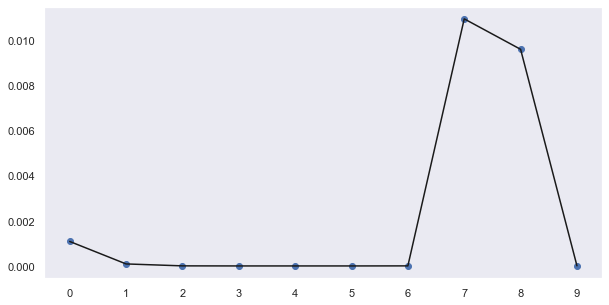

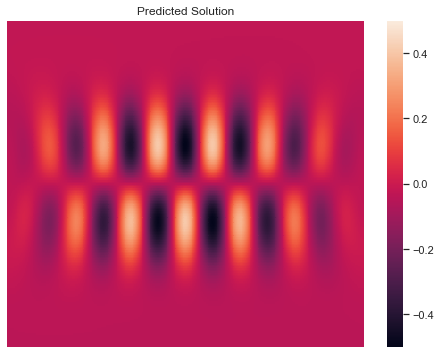

iteration 710: loss = 0.021229075267910957
iteration 720: loss = 0.020375553518533707
iteration 730: loss = 0.019934142008423805
iteration 740: loss = 0.02407321333885193
iteration 750: loss = 0.01944611594080925
iteration 760: loss = 0.017759423702955246
iteration 770: loss = 0.01695072650909424
iteration 780: loss = 0.016434377059340477
iteration 790: loss = 0.015910429880023003
iteration 800: loss = 0.015377563424408436


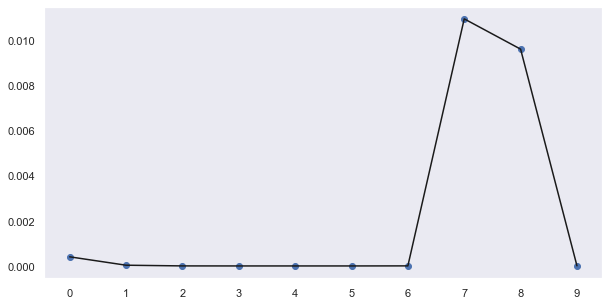

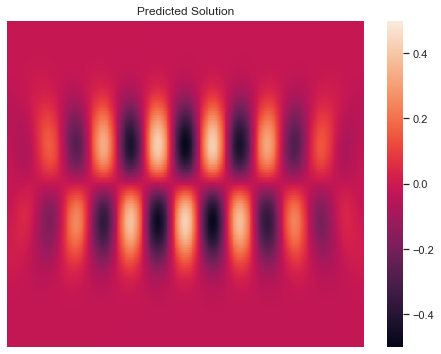

iteration 810: loss = 0.01496654562652111
iteration 820: loss = 0.018410591408610344
iteration 830: loss = 0.015819106251001358
iteration 840: loss = 0.014942732639610767
iteration 850: loss = 0.013446171768009663
iteration 860: loss = 0.013164795935153961
iteration 870: loss = 0.01270666066557169
iteration 880: loss = 0.012399854138493538
iteration 890: loss = 0.01751209981739521
iteration 900: loss = 0.014702197164297104


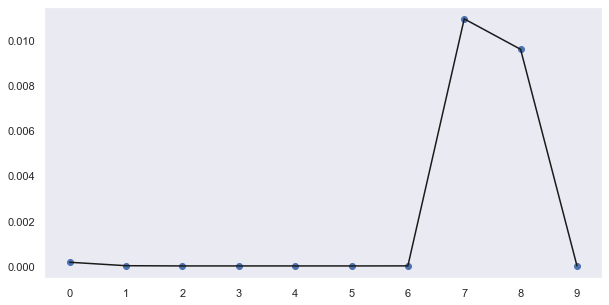

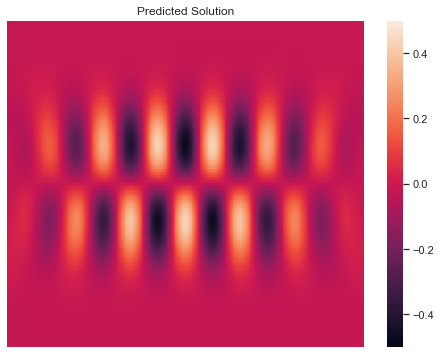

iteration 910: loss = 0.01158134825527668
iteration 920: loss = 0.01153156440705061
iteration 930: loss = 0.011024181731045246
iteration 940: loss = 0.011045826599001884
iteration 950: loss = 0.014362387359142303
iteration 960: loss = 0.010436314158141613
iteration 970: loss = 0.010113115422427654
iteration 980: loss = 0.009802999906241894
iteration 990: loss = 0.009762460365891457
iteration 1000: loss = 0.00939244031906128


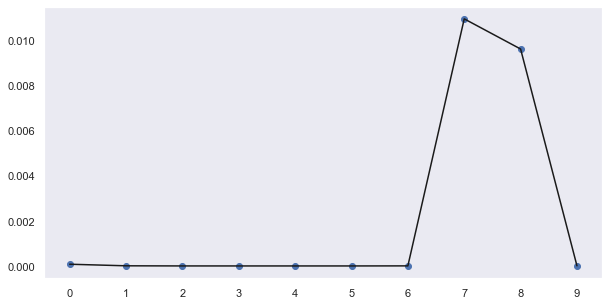

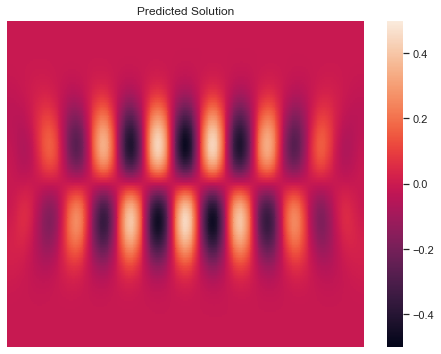

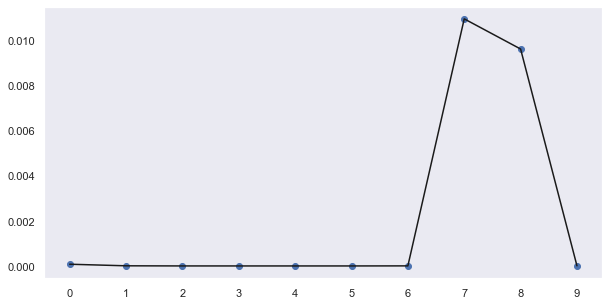

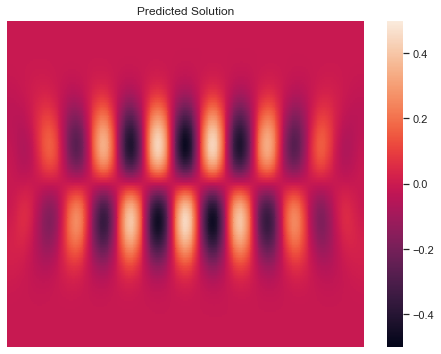

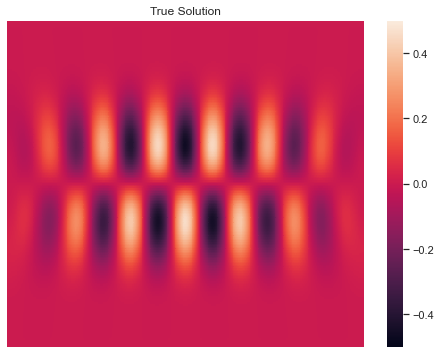

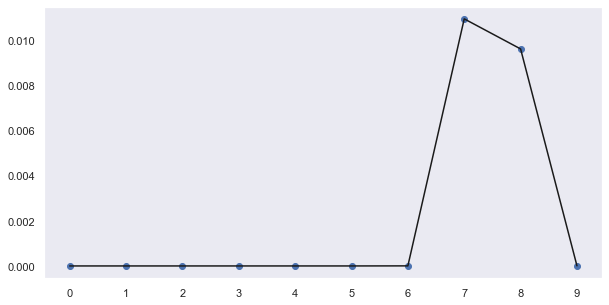

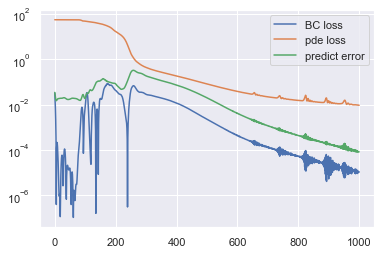

In [1]:
import torch

from Basis import SPHBasis
from Problem import Problem_Sphere_Poisson
from Model import Model
from Net import Sphere_Net, SPH_Sphere_Net
import seaborn as sns
import matplotlib.pyplot as plt
import math
from math import pi
from spherical_harmonics import *
from torch.distributions.uniform import Uniform
from numpy import arccos
import numpy as np

import pyshtools
from pyshtools.shio import shread
from pyshtools.expand import MakeGridDH
from pyshtools.expand import SHExpandDH
from pyshtools.spectralanalysis import spectrum

torch.manual_seed(0)
maxiter = 1001
problem = Problem_Sphere_Poisson()


def construct_model(net):
    class Poisson1dModel(Model):
        def add_loss_history(self):
            self.loss_history.append([self.bc_loss, self.pde_loss, self.predict_error_value])

        def __init__(self):
            super().__init__(problem=problem, net=net, maxiter=maxiter)

        def inner_sample(self, N=25):
            N = 25
#             cos_azimuth = torch.linspace(-0.9999, 0.9999, N, requires_grad=False)
#             azimuth = torch.arccos(cos_azimuth)
            azimuth = torch.linspace(0.0001, pi, N, requires_grad=False)
            polar = torch.linspace(0, 2*pi, 2*N, requires_grad=False)
            
            ## noise
#             dpolar = 2*pi/(2*N-1)
#             dazimuth = 2.0/(N-1)
#             polar_noise = torch.distributions.Uniform(low = -dpolar/2, high = dpolar/2).sample(sample_shape=torch.Size(polar.shape))
#             azimuth_noise = torch.distributions.Uniform(low = -dazimuth/2, high = dazimuth/2).sample(sample_shape=torch.Size(azimuth.shape))            
#             azimuth, polar = azimuth + azimuth_noise, polar + polar_noise

            azimuth, polar = torch.meshgrid(azimuth, polar)
            location = torch.cat([azimuth.reshape(-1, 1), polar.reshape(-1, 1)], dim=1)
            return location
#             x = torch.randn(num, 3)
#             x = x / (torch.norm(x, dim=1).reshape((-1, 1)))
        
#             polar = torch.atan(x[:, :1] / x[:, 1:2]) + math.pi / 2
#             polar[:num // 2, 0] = polar[:num // 2, 0] + math.pi
#             azimuth = torch.acos(x[:, 2:3])
            
#             ## noise
#             dpolar = 2 * pi/(num-1) 
#             polar_noise = polar + torch.distributions.Uniform(low = -dpolar/2, high = dpolar/2).sample(sample_shape=torch.Size(polar.shape))
            
#             dazimuth = pi/(num-1) 
#             azimuth_noise = azimuth + torch.distributions.Uniform(low = -dazimuth/2, high = dazimuth/2).sample(sample_shape=torch.Size(polar.shape))            
            
#             x = torch.cat([azimuth_noise, polar_noise], dim=1)
#             return x

        def bc_sample(self):
            return torch.tensor([[1., 1.]])

        def init_sample(self):
            pass

        def plot(self, net):
            azimuth = torch.linspace(0, math.pi, 200, requires_grad=False)
            polar = torch.linspace(0, 2 * math.pi, 400, requires_grad=False)
            azimuth, polar = torch.meshgrid(azimuth, polar)
            location = torch.cat([azimuth.reshape(-1, 1), polar.reshape(-1, 1)], dim=1)
            value = net(location)
            
            value = value.reshape((200, 400))
            self.spherical_harmonic_transform(value)
            fig, ax = plt.subplots(1, 1, figsize=(8, 6))
            sns.set()
            sns.heatmap(value.detach().numpy(), ax=ax, vmin=-0.5, vmax=0.5, cbar=True)
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_title("Predicted Solution")
            plt.show()
            
            
        
        def spherical_harmonic_transform(self, function_grid):
#             azimuth = torch.linspace(0, math.pi, 200, requires_grad=False)
#             polar = torch.linspace(0, 2 * math.pi, 400, requires_grad=False)
#             azimuth, polar = torch.meshgrid(azimuth, polar)
#             location = torch.cat([azimuth.reshape(-1, 1), polar.reshape(-1, 1)], dim=1)
#             function_grid = net(location)
#             function_grid = function_grid.reshape((200, 400))
            
#             print(f'grid dims{function_grid}')

            coefficients = SHExpandDH(function_grid.detach().numpy(), sampling=2)
#             print(coefficients)
            nl = coefficients.shape[1]
            ls = np.arange(nl)[:10]
#             print(ls)

            power_per_l = spectrum(coefficients)[:10]
#             print(power_per_l)
            fig, ax = plt.subplots(1, 1, figsize=(len(ls), 5))
            ax.plot(ls, power_per_l, 'bo')
            ax.plot(ls, power_per_l, 'k-')
            plt.xticks(range(len(ls)))
            # ax.set_yscale('log')
            # ax.set_xscale('log')
            ax.grid()
            plt.show()
            
        
        def plot_true(self):
            azimuth = torch.linspace(0, math.pi, 200, requires_grad=False)
            polar = torch.linspace(0, 2 * math.pi, 400, requires_grad=False)
            azimuth, polar = torch.meshgrid(azimuth, polar)
            location = torch.cat([azimuth.reshape(-1, 1), polar.reshape(-1, 1)], dim=1)
            value = true_solution(location[:, 0:1], location[:, 1:])
            
            value = value.reshape((200, 400))
            
            fig, ax = plt.subplots(1, 1, figsize=(8, 6))
            sns.set()
            sns.heatmap(value.detach().numpy(), ax=ax, vmin=-0.5, vmax=0.5, cbar=True)
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_title("True Solution")
            plt.show()
            self.spherical_harmonic_transform(value)
            
        def post_process(self, ax=None):
            if ax is None:
                plt.plot(self.loss_history)
                plt.yscale('log')
                plt.legend(('BC loss', 'pde loss', 'predict error'))
                plt.show()
            else:
                ax.plot(self.loss_history)
                ax.set_yscale('log')
                ax.set_ylim(1e-4, 100)
                ax.legend(('BC loss', 'pde loss', 'predict error'))

        def predict_error(self):
            coor = self.inner_sample(N=27)
            true = self.problem.ground_truth(coor)
            predict = self.net(coor)
            predict_error = self.pde_loss_f(true, predict)
            return predict_error

        def train(self, ax100=None):
            problem = self.problem
            net = self.net
            opt = self.opt
            maxiter = self.maxiter

            for iter in range(maxiter):
                net.zero_grad()

                coor_inner = self.inner_sample().detach().requires_grad_(True)
                infer_value_inner = net(coor_inner)
                truth_inner, predict_inner = problem.pde(coor_inner, infer_value_inner)
                self.pde_loss = self.pde_loss_f(predict_inner, truth_inner)

                bc_samples = self.bc_sample()
                if bc_samples is None:
                    self.bc_loss = torch.tensor(0.)
                else:
                    coor_bc = bc_samples.detach().requires_grad_(True)
                    infer_value_bc = net(coor_bc)
                    truth_bc, predict_bc = problem.bound_condition(coor_bc, infer_value_bc)
                    self.bc_loss = self.bc_loss_f(predict_bc, truth_bc)

                init_samples = self.init_sample()
                if init_samples is None:
                    self.init_loss = torch.tensor(0.)
                else:
                    coor_init = init_samples.detach().requires_grad_(True)
                    infer_value_init = net(coor_init)
                    truth_init, predict_init = problem.bound_condition(coor_init, infer_value_init)
                    self.init_loss = self.bc_loss_f(predict_init, truth_init)
                self.predict_error_value = self.predict_error()
                self.total_loss = self.pde_loss + self.bc_loss + self.init_loss
                self.add_loss_history()
                self.total_loss.backward()

                opt.step()
                opt.zero_grad()
                
                for i in range(len(self.loss_history)):
                    for j in range(3):
                        self.loss_history[i][j] = self.loss_history[i][j].detach().requires_grad_(False)
                        
                if iter % (maxiter // 100) == 0:
                    print("iteration {}: loss = {}".format(iter, self.total_loss))
                        
                if iter % int(maxiter / 10) == 0:
                    self.plot(net)
                
            self.plot(net)
            self.plot_true()
            self.post_process()

    return Poisson1dModel()

model = construct_model(Sphere_Net([3, 50, 50, 50, 16, 1]))
model.train()
